In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
from numpy import array, exp

In [18]:
V = [0, 100.2, 115.2, 129.6, 145, 160.6, 174.3, 189.8, 205.4, 220.8, 234.8, 249]
Vprobe1 = [0, 8.35, 9.56, 10.83, 11.9, 13.42, 14.51, 15.87, 17.03, 18.52, 19.47, 20.9]
Vprobe2 = [0, 6.82, 7.82, 8.78, 9.68, 10.86, 11.76, 12.78, 13.84, 14.94, 15.73, 16.94]
V_err = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.5]

d = 14.9 #мм - диаметр пробной катушки
d_err = 0.1
N = 44 #витки на пробной катушке
nu = 400 #Гц - частота модуляции, указана в лабнике
f0 = 162.4 * 10**6 #МГц - резонансная частота
A = 10 #ширина резонанса
A_half = 0.8 #полуширина пика
h = 6.6254*10**(-34)
mu = 927.33*10**(-26)

Аппроксимировали прямой  0.08 * x + -0.02
Для напряжения катушки 6.54 мВ напряжение ЛАТР имеет величину 81.5 мВ


<Figure size 432x288 with 0 Axes>

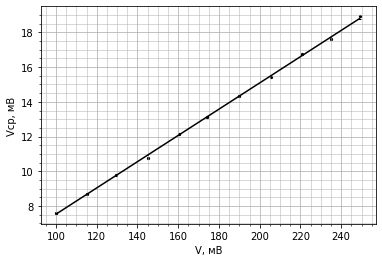

In [19]:
fig = plt.figure()
Vprobe = [(Vprobe1[i]+Vprobe2[i])/2 for i in range(len(Vprobe1))]

z = np.polyfit(V, Vprobe, 1)
f = np.poly1d(z)
print("Аппроксимировали прямой ", round(f.c[0], 2) ,'* x +', round(f.c[1], 2))

Vprobe_new = f(V[1::])

Vp = round((6.61+6.48)/2, 2)

x = (Vp + round(f.c[1], 2))/round(f.c[0], 2)

print('Для напряжения катушки', Vp, 'мВ напряжение ЛАТР имеет величину', round(x, 2), 'мВ')

fig, ax = plt.subplots()

plt.scatter(V[1::], Vprobe[1::], s = 5, color = 'black')
plt.plot(V[1::], Vprobe_new, color = 'black')
plt.errorbar(V[1::], Vprobe_new, xerr = V_err[1::], fmt='none',ecolor = 'black',elinewidth = 1)

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel ('Vср, мВ')
ax.set_xlabel('V, мВ')
plt.show()
fig.savefig('V (Vср)', dpi = 1000)

In [25]:
def mapping(x, a): 
    return a * x #задание целевой функции, которой мы апроксимируем

args, _ = curve_fit(mapping, V[1::], Vprobe_new) #нашли аргументы целевой функции
a1 = args[0]
y_fit1 = [i for i in range(len(V))]
for i in range (1,len(V)):
    y_fit1[i] = a1 * V[i]
    
args, covar = curve_fit(mapping, V[1::],Vprobe_new) 
print("Arguments: ", args)

Arguments:  [0.07543456]


## Рассчет всех величин
$B_{\text{мод}} = \dfrac{2\sqrt{2}V_p}{\pi^2 d_{\text{проб}}^2 N_{\text{проб}}\nu}$

$\sigma_{B_{\text{мод}}}=\sqrt{\left(\dfrac{\partial B_{\text{мод}}}{\partial \mathcal{E}} \right)^2 \sigma^2_\mathcal{E} + \left(\dfrac{\partial B_{\text{мод}}}{\partial d_{\text{проб}}} \right)^2 \sigma^2_{d_{\text{проб}}}}$

$\Delta B = \dfrac{A_{1/2}}{A_{\text{полн}}} B_{\text{мод}}$

$\sigma_{\Delta B} = \sqrt{ \left(\dfrac{\partial \Delta B}{\partial A_{\text{полн}}} \right)^2 \sigma^2_{A_{\text{полн}}} +  \left(\dfrac{\partial \Delta B}{\partial A_{\text{1/2}}} \right)^2 \sigma^2_{A_{\text{1/2}}} + \left(\dfrac{\partial \Delta B}{\partial B_{\text{мод}}} \right)^2 \sigma^2_{B_{\text{мод}}}}$

$k = \dfrac{\langle  V_{\text{сред}} V_R\rangle}{V_R^2},~\sigma_k = \dfrac{1}{\sqrt{n}}\sqrt{\dfrac{\langle V_{\text{сред}}^2 \rangle}{\langle V_R^2 \rangle} - k^2}$

$B_0 = \dfrac{4k U}{\pi \omega d_{\text{проб}}^2 N_{\text{проб}}}$

$\sigma_{B_0} = \sqrt{ \left( \dfrac{\partial B_0}{\partial k}\right)^2 \sigma_{k}^2 + \left( \dfrac{\partial B_0}{\partial U_R}\right)^2 \sigma_{U_R}^2 + \left( \dfrac{\partial B_0}{\partial d_{\text{проб}}}\right)^2 \sigma_{d_{\text{проб}}}^2}$

$g = \dfrac{hf_0}{\mu_B B_0}$

$\sigma_g = \sqrt{ \left( \dfrac{\partial g}{\partial f_0}\right)^2 \sigma_{f_0}^2 + \left( \dfrac{\partial g}{\partial B_0}\right)^2 \sigma_{B_0}^2}$

In [26]:
Bmod = np.sqrt(8)*Vp/((np.pi*d*10**(-3))**2 * N * nu)
deltaB = A_half * Bmod/A
B0 = 2*round(x, 2)/((np.pi*d*10**(-3))**2 * N * nu)
g = h*f0/(mu*B0*10**(-3))

print('Bmod =', Bmod, '\ndeltaB =', deltaB, '\nB0 =', B0, '\ng =', g)

Bmod = 0.47966473668773446 
deltaB = 0.03837317893501876 
B0 = 4.226711975940134 
g = 2.745118926276999
